# The basic model for multiple regression analysis
이 챕터에서는 multiple predictors 를 이용한 regression analysis 를 예제로 시작한다. 

<기본개념>
y = β0 + β1x1 + · · · + βkxk + e  

    x1 ~ xk 는 explanatory variables = predictors 
    β1 ~ βk 는 parameter

## (1) confirmatory analysis
 : 모형선택이 이론에 근거를 둔 경우에 대한 분석
## (2) exploratory analysis
 : 적용할 이론을 사전에 정해놓지 않고 가능한 여러 모형을 고려한 후 가장 적절한 모형을 고르는 분석
 
    ## 일반적으로 모형을 선택할 때
    1. 종속변수와 상관관계가 놓은 변수
    2. 선택된 독립변수들 간에는 상관관계가 낮아야
    3. 소수정예의 원칙을 따른다.
    
### 모형 선택의 방법
1. all possible regression : 가능한 모든 독립변수들의 조합으로..
2. forward selection : 가장 유의한 변수부터 덜 유의한 변수순으로 하나씩 추가
3. backward selection : 모든 변수를 넣고 가장 기여도가 낮은 변수부터 제거
4. stepwise : forward 와 backward 방법을 조합해 나가는 방법

=> 변수들 간의 상관과계가 어느정도 있다면 forward selection 의 경우 의미있는 factor라도 최종모형에 선택되지 않을 가능성이 높기 때문에, 변수수가 많지 않다면 backward elimination 을 보통 권장한다.


## 11.1 Plotting multivariate data
- As an example in this chapter, we use a study concerning lung function in patients with cystic fibrosis in Altman (1991, p. 338). 
- cystfibr data frame in the ISwR package.

In [2]:
# 준비
install.packages("ISwR", repos='http://cran.us.r-project.org')
library(ISwR)

Installing package into ‘/home/seung-hyun/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)



The downloaded source packages are in
	‘/tmp/RtmpqlvXc8/downloaded_packages’


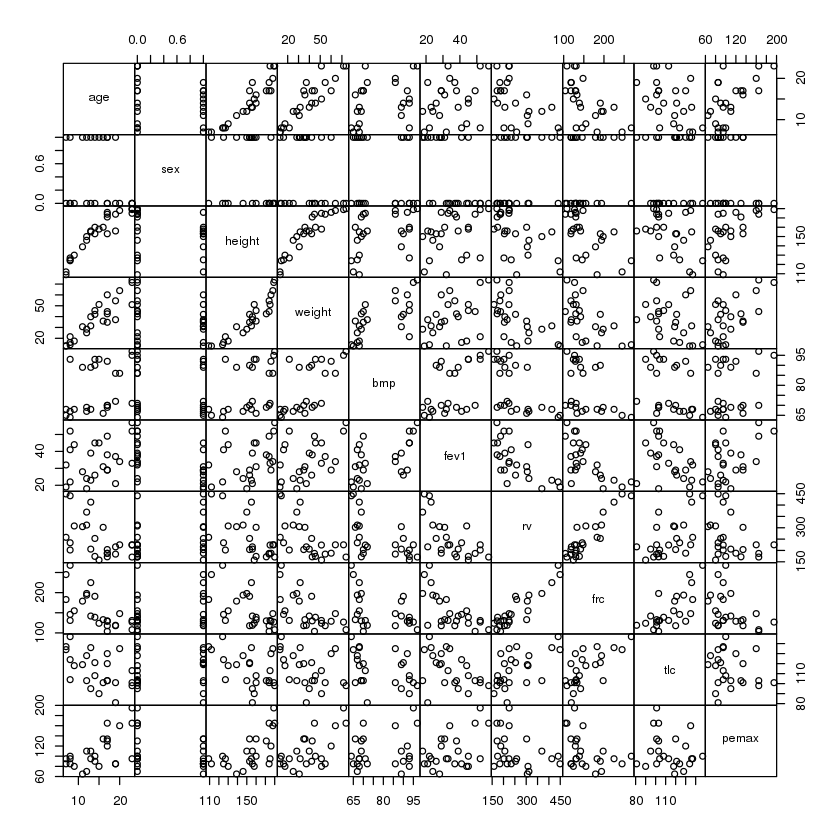

In [10]:
# 데이터셋에서 모든변수에 대한 pairwise scatterplots 을 그려본다.
par(mex=0.5) # interline distance
pairs(cystfibr, gap=0, cex.labels=0.9) # gap : subplot space, cex.labels : font size


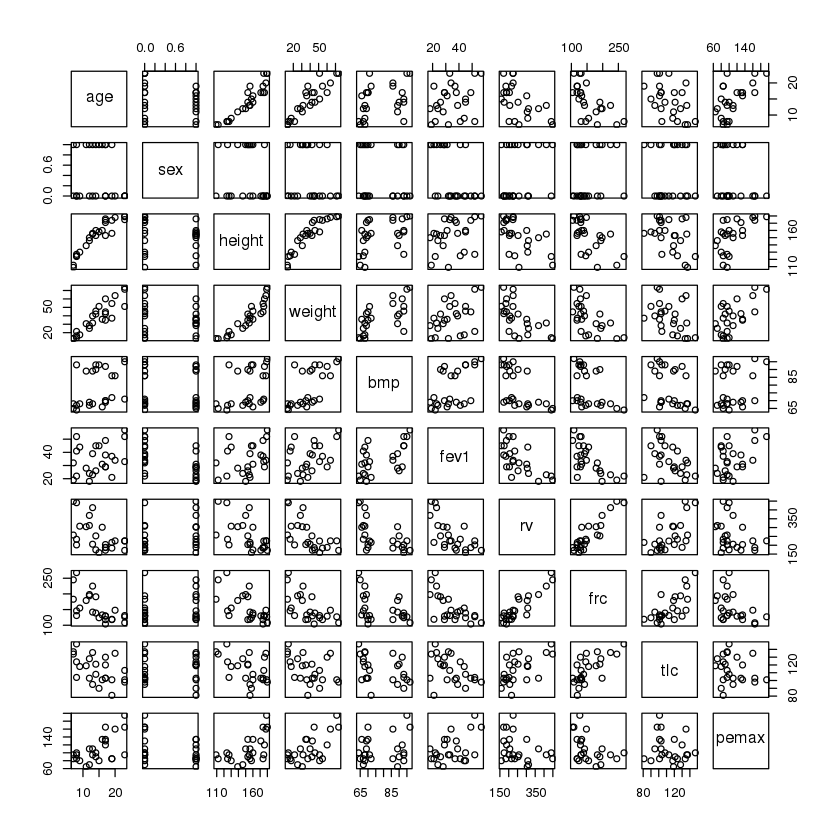

In [12]:
plot(cystfibr) # 거의 비슷한 Plot 을 그려준다. 

## 11.2 Model specification and output

In [7]:
library(ISwR)
attach(cystfibr) # 이 데이터셋은 age, sex 같은 흔한 이름의 변수를 가지고 있기 때문에 미리 설정해놓자.
head(cystfibr)

# pemax = maximal expiratory pressure.(MEP) => 호흡근의 strenth를 파악.
# bmp = body mass percentile


The following object is masked from package:ISwR:

    tlc



,age,sex,height,weight,bmp,fev1,rv,frc,tlc,pemax
1,7,0,109,13.1,68,32,258,183,137,95
2,7,1,112,12.9,65,19,449,245,134,85
3,8,0,124,14.1,64,22,441,268,147,100
4,8,1,125,16.2,67,41,234,146,124,85
5,8,0,127,21.5,93,52,202,131,104,95
6,9,0,130,17.5,68,44,308,155,118,80


![Lung function](http://www.clevelandclinicmeded.com/medicalpubs/diseasemanagement/pulmonary/pulmonary-function-testing/images/pulmonary-function-fig2_large.jpg "Lung function")

In [16]:
lm(pemax~age+sex+height+weight+bmp+fev1+rv+frc+tlc)
summary(lm(pemax~age+sex+height+weight+bmp+fev1+rv+frc+tlc))


Call:
lm(formula = pemax ~ age + sex + height + weight + bmp + fev1 + 
    rv + frc + tlc)

Coefficients:
(Intercept)          age          sex       height       weight          bmp  
   176.0582      -2.5420      -3.7368      -0.4463       2.9928      -1.7449  
       fev1           rv          frc          tlc  
     1.0807       0.1970      -0.3084       0.1886  



Call:
lm(formula = pemax ~ age + sex + height + weight + bmp + fev1 + 
    rv + frc + tlc)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.338 -11.532   1.081  13.386  33.405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 176.0582   225.8912   0.779    0.448
age          -2.5420     4.8017  -0.529    0.604
sex          -3.7368    15.4598  -0.242    0.812
height       -0.4463     0.9034  -0.494    0.628
weight        2.9928     2.0080   1.490    0.157
bmp          -1.7449     1.1552  -1.510    0.152
fev1          1.0807     1.0809   1.000    0.333
rv            0.1970     0.1962   1.004    0.331
frc          -0.3084     0.4924  -0.626    0.540
tlc           0.1886     0.4997   0.377    0.711

Residual standard error: 25.47 on 15 degrees of freedom
Multiple R-squared:  0.6373,	Adjusted R-squared:  0.4197 
F-statistic: 2.929 on 9 and 15 DF,  p-value: 0.03195


## No significant t value + F test significant
 : 의미있는 변수는 없다. 적어도 현 모델에서는 => 변수를 재조합하여 새로운 모델이 필요.
## unadjusted 와 adjusted R2 값이 크게 다르다.
 => number of degrees of freedom 에 비해 변수의 수가 상대적으로 많다.

In [17]:
anova(lm(pemax~age+sex+height+weight+bmp+fev1+rv+frc+tlc)) 
# age 만 significant, stepwise 분석에서도 의미가 있었음. bmp 는 marginal 하였음. 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
age,1,10098.48,10098.48,15.56606,0.001295644
sex,1,955.4278,955.4278,1.472721,0.2436805
height,1,154.97,154.97,0.2388747,0.6320886
weight,1,632.3354,632.3354,0.9746981,0.3391699
bmp,1,2862.216,2862.216,4.411894,0.05301026
fev1,1,1549.082,1549.082,2.387795,0.1431197
rv,1,561.9241,561.9241,0.8661644,0.3667568
frc,1,194.5536,194.5536,0.29989,0.5920073
tlc,1,92.40351,92.40351,0.1424332,0.7111603
Residuals,15,9731.25,648.75,NA,NA


In [19]:
summary(anova(lm(pemax~age+sex+height+weight+bmp+fev1+rv+frc+tlc)))

       Df           Sum Sq           Mean Sq           F value       
 Min.   : 1.0   Min.   :   92.4   Min.   :   92.4   Min.   : 0.1424  
 1st Qu.: 1.0   1st Qu.:  286.4   1st Qu.:  286.4   1st Qu.: 0.2999  
 Median : 1.0   Median :  793.9   Median :  640.5   Median : 0.9747  
 Mean   : 2.4   Mean   : 2683.3   Mean   : 1775.0   Mean   : 2.9289  
 3rd Qu.: 1.0   3rd Qu.: 2533.9   3rd Qu.: 1400.7   3rd Qu.: 2.3878  
 Max.   :15.0   Max.   :10098.5   Max.   :10098.5   Max.   :15.5661  
                                                    NA's   :1        
     Pr(>F)        
 Min.   :0.001296  
 1st Qu.:0.143120  
 Median :0.339170  
 Mean   :0.342477  
 3rd Qu.:0.592007  
 Max.   :0.711160  
 NA's   :1         

In [10]:
# Age 외의 다른 변수들이 모델에 미치는 영향을 계산해보자. 이전모델과 비교해야 하므로 ANOVA의 F-test를 이용할수있다.!!

# 하지만, 먼저 손으로 계산하는 방법을 알아보자.

# ANOVA 에서 significant 하였던 age factor를 제외한후, 나머지 the sums of squares 를 더함. 
955.4+155.0+632.3+2862.2+1549.1+561.9+194.6+92.4
# 8개의 변수 이므로
7002.9/8
# others 의 Mean Sq 는 875.3625 이며 잔차가 648.75 이므로 
875.36/648.7
# others 의 F 값은 1.349407 이므로
1-pf(1.349407,8,15) # p value (df 는 8과 15니까..)

[1] 7002.9

[1] 875.3625

[1] 1.349407

[1] 0.2935148

# 정리하면
             Df   Sum Sq     Mean Sq    F     Pr(>F)

    age      1   10098.5     10098.5  15.566  0.00130

    others   8    7002.9       875.4   1.349  0.29351

    Residual 15   9731.2       648.7

In [20]:
# 위의 계산은 ANOVA F-TEST 를 이용하여 두 모델을 비교해 볼수 있다. 

m1<-lm(pemax~age+sex+height+weight+bmp+fev1+rv+frc+tlc)

m2<-lm(pemax~age)

anova(m1,m2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,15,9731.25,NA,NA,NA,NA
2,23,16734.16,-8,-7002.912,1.349309,0.2935554


=> 적어도 ANOVA를 이용한 모델에서는 Age 를 제외한 모든 변수를 제거하여도 모델에 큰 영향이 없음을 알수있다. (p = 0.2935)  
하지만, 이것은 두 모델간의 비교이지 더 나은 모델이 없다는 말은 아니니 주의 필요.


## 11.3 Model search
### step() function  => performing model searches by the Akaike information criterion (AIC)
- 여기서 우리는 손으로 하는 backwards elimination 방법으로 실습해보자.

In [21]:
summary(lm(pemax~age+sex+height+weight+bmp+fev1+rv+frc+tlc))


Call:
lm(formula = pemax ~ age + sex + height + weight + bmp + fev1 + 
    rv + frc + tlc)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.338 -11.532   1.081  13.386  33.405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 176.0582   225.8912   0.779    0.448
age          -2.5420     4.8017  -0.529    0.604
sex          -3.7368    15.4598  -0.242    0.812
height       -0.4463     0.9034  -0.494    0.628
weight        2.9928     2.0080   1.490    0.157
bmp          -1.7449     1.1552  -1.510    0.152
fev1          1.0807     1.0809   1.000    0.333
rv            0.1970     0.1962   1.004    0.331
frc          -0.3084     0.4924  -0.626    0.540
tlc           0.1886     0.4997   0.377    0.711

Residual standard error: 25.47 on 15 degrees of freedom
Multiple R-squared:  0.6373,	Adjusted R-squared:  0.4197 
F-statistic: 2.929 on 9 and 15 DF,  p-value: 0.03195


In [22]:
# Lung function 을 제외해보자.. TLC 부터 제외해보자.
summary(lm(pemax~age+sex+height+weight+bmp+fev1+rv+frc)


Call:
lm(formula = pemax ~ age + sex + height + weight + bmp + fev1 + 
    rv + frc)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.072 -10.067   0.113  13.526  36.990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 221.8055   185.4350   1.196   0.2491  
age          -3.1346     4.4144  -0.710   0.4879  
sex          -4.6933    14.8363  -0.316   0.7558  
height       -0.5428     0.8428  -0.644   0.5286  
weight        3.3157     1.7672   1.876   0.0790 .
bmp          -1.9403     1.0047  -1.931   0.0714 .
fev1          1.0183     1.0392   0.980   0.3417  
rv            0.1857     0.1887   0.984   0.3396  
frc          -0.2605     0.4628  -0.563   0.5813  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.78 on 16 degrees of freedom
Multiple R-squared:  0.6339,	Adjusted R-squared:  0.4508 
F-statistic: 3.463 on 8 and 16 DF,  p-value: 0.01649


In [24]:
# 다 빼고나면... weight bmp 만 의미가 있다. 
summary(lm(pemax~age+sex+height+weight+bmp))


Call:
lm(formula = pemax ~ age + sex + height + weight + bmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.194  -9.412  -2.425   9.157  40.112 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 280.4482   124.9556   2.244   0.0369 *
age          -3.0750     3.6352  -0.846   0.4081  
sex         -11.5281    10.3720  -1.111   0.2802  
height       -0.6853     0.7962  -0.861   0.4001  
weight        3.5546     1.5281   2.326   0.0312 *
bmp          -1.9613     0.9263  -2.117   0.0476 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.27 on 19 degrees of freedom
Multiple R-squared:  0.548,	Adjusted R-squared:  0.429 
F-statistic: 4.606 on 5 and 19 DF,  p-value: 0.006388


In [25]:
# 여기에 추가적으로 age, sex and height 를 제거하면 bmp 는 더이상 significant 하지 않다. 
summary(lm(pemax~weight+bmp))


Call:
lm(formula = pemax ~ weight + bmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.924 -13.399   4.361  16.642  48.404 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 124.8297    37.4786   3.331 0.003033 ** 
weight        1.6403     0.3900   4.206 0.000365 ***
bmp          -1.0054     0.5814  -1.729 0.097797 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.31 on 22 degrees of freedom
Multiple R-squared:  0.4749,	Adjusted R-squared:  0.4271 
F-statistic: 9.947 on 2 and 22 DF,  p-value: 0.0008374


#### 이 데이터를 사용한논문 원저(Altman, 1991) 에서는  weight, fev1, and bmp 가 p value 0.05 미만의 의미있는 factor 였다. 
- 하지만 지금 결과는 이 것과 거리가 멀다. => age, weight height 가 어린이와 청소년에서 pemax와 관련이 있으니 이것으로 모델을 구성해보자. 

In [27]:
summary(lm(pemax~age+weight+height))


Call:
lm(formula = pemax ~ age + weight + height)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.675 -21.566   3.229  16.274  48.068 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 64.65555   82.40935   0.785    0.441
age          1.56755    3.14363   0.499    0.623
weight       0.86949    0.85922   1.012    0.323
height      -0.07608    0.80278  -0.095    0.925

Residual standard error: 27.41 on 21 degrees of freedom
Multiple R-squared:  0.4118,	Adjusted R-squared:  0.3278 
F-statistic: 4.901 on 3 and 21 DF,  p-value: 0.009776


In [9]:
summary(lm(pemax~age+height)) # weight 제거


Call:
lm(formula = pemax ~ age + height)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.817 -17.883   3.815  18.275  53.824 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  17.8600    68.2493   0.262    0.796
age           2.7178     2.9325   0.927    0.364
height        0.3397     0.6900   0.492    0.627

Residual standard error: 27.43 on 22 degrees of freedom
Multiple R-squared:  0.3831,	Adjusted R-squared:  0.3271 
F-statistic: 6.832 on 2 and 22 DF,  p-value: 0.00492


In [28]:
summary(lm(pemax~age)) # weight + height 제거


Call:
lm(formula = pemax ~ age)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.666 -17.174   6.209  16.209  51.334 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   50.408     16.657   3.026  0.00601 **
age            4.055      1.088   3.726  0.00111 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.97 on 23 degrees of freedom
Multiple R-squared:  0.3764,	Adjusted R-squared:  0.3492 
F-statistic: 13.88 on 1 and 23 DF,  p-value: 0.001109


In [29]:
summary(lm(pemax~height)) # age + weight제거


Call:
lm(formula = pemax ~ height)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.876 -19.306   1.787  18.170  61.464 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -33.2757    40.0445  -0.831  0.41453   
height        0.9319     0.2596   3.590  0.00155 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.34 on 23 degrees of freedom
Multiple R-squared:  0.3591,	Adjusted R-squared:  0.3312 
F-statistic: 12.89 on 1 and 23 DF,  p-value: 0.001549


### elimination method 에서는 weight만 의미있는 변수였다. 

항상 이같은 해석을 주의해야한다. 다른 데이터 셋에서 이런 분석을 한경우 같은 변수가 나올 확률은 떨어진다.

=> 그래서 항상 previous investigation 결과 와 이론적인 면을 고려해서 변수를 선택하여 reasonable 한 모형을 선택하는 것이 중요함.

